# IMDB Movie Reviews Sentiment Classification

We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 42s 2us/step


In [6]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
y_train[0]

1

In [9]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 6s 4us/step


In [10]:
# Reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the review; note that indices were offset by 3.
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [14]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [18]:
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [20]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 227us/step - loss: 0.5081 - acc: 0.7818 - val_loss: 0.3796 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.3004 - acc: 0.9044 - val_loss: 0.3003 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3085 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1751 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1428 - acc: 0.9545 - val_loss: 0.2847 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1151 - acc: 0.9653 - val_loss: 0.3156 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.0981 - acc: 0.9705 - val_loss: 0.3126 - val_a

In [31]:
result = model.evaluate(X_test, y_test)
result

25000/25000 [==============================] - 1s 55us/step


[0.793394502658844, 0.84632]

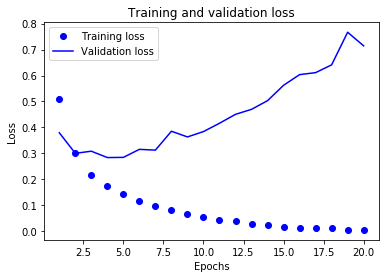

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

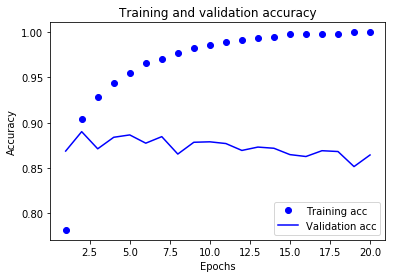

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see that val_loss is the lowest at epoch 4.

In [32]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(X_val, y_val))

result = model.evaluate(X_test, y_test)
print(result)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 231us/step - loss: 0.5324 - acc: 0.7917 - val_loss: 0.4077 - val_acc: 0.8693
Epoch 2/4
15000/15000 [==============================] - 1s 74us/step - loss: 0.3268 - acc: 0.8987 - val_loss: 0.3160 - val_acc: 0.8857
Epoch 3/4
15000/15000 [==============================] - 1s 75us/step - loss: 0.2365 - acc: 0.9243 - val_loss: 0.2828 - val_acc: 0.8902
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step
[0.30108582969665526, 0.8776]
